In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# ** Depression Prediction**

In [2]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score, recall_score, f1_score,roc_auc_score,classification_report,mean_squared_error

c:\Python\Python36\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
data=pd.read_csv('data.csv')
data.head()

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,...,screensize,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize,major
0,4,28,3890,4,25,2122,2,16,1944,4,...,1,1,1,12,1,10,2,1,2,NaN
1,4,2,8118,1,36,2890,2,35,4777,3,...,2,1,2,7,0,70,2,1,4,NaN
2,3,7,5784,1,33,4373,4,41,3242,1,...,2,1,1,4,3,60,1,1,3,NaN
3,2,23,5081,3,11,6837,2,37,5521,1,...,2,1,2,4,5,70,2,1,5,biology
4,2,36,3215,2,13,7731,3,5,4156,4,...,2,2,3,10,1,10,2,1,4,Psychology


In [4]:
data_1=data.copy()
data_1['major']=data_1['major'].replace(np.nan,'No Degree')
time = [i for i in data_1.iloc[:,0:126] if  'E' in i]
position = [i for i in data_1.iloc[:,0:126] if  'I' in i]
data_1=data_1.drop(position,axis=1)
data_1=data_1.drop(time,axis=1)
data_1=data_1.drop(data_1.iloc[:,43:47],axis=1) # source, ..
data_2=data_1.copy()
data_2=data_2.drop(data_2.iloc[:,53:69],axis=1) # The VCL question for validity
data_2=data_2.replace(to_replace=0,value=3)
data_2=data_2.rename(columns={'TIPI1':'Extraverted-enthusiastic','TIPI2':'Critical-quarrelsome',
                            'TIPI3':'Dependable-self_disciplined','TIPI4':'Anxious-easily upset',
                            'TIPI5':'Open to new experiences-complex','TIPI6':'Reserved-quiet',
                            'TIPI7':'Sympathetic-warm','TIPI8':'Disorganized-careless','TIPI9':'Calm-emotionally_stable',
                            'TIPI10':'Conventional-uncreative'})
print('Shape',data_2.shape)
print('Attributes',data_2.columns)

Shape (39775, 68)
Attributes Index(['Q1A', 'Q2A', 'Q3A', 'Q4A', 'Q5A', 'Q6A', 'Q7A', 'Q8A', 'Q9A', 'Q10A',
       'Q11A', 'Q12A', 'Q13A', 'Q14A', 'Q15A', 'Q16A', 'Q17A', 'Q18A', 'Q19A',
       'Q20A', 'Q21A', 'Q22A', 'Q23A', 'Q24A', 'Q25A', 'Q26A', 'Q27A', 'Q28A',
       'Q29A', 'Q30A', 'Q31A', 'Q32A', 'Q33A', 'Q34A', 'Q35A', 'Q36A', 'Q37A',
       'Q38A', 'Q39A', 'Q40A', 'Q41A', 'Q42A', 'country',
       'Extraverted-enthusiastic', 'Critical-quarrelsome',
       'Dependable-self_disciplined', 'Anxious-easily upset',
       'Open to new experiences-complex', 'Reserved-quiet', 'Sympathetic-warm',
       'Disorganized-careless', 'Calm-emotionally_stable',
       'Conventional-uncreative', 'education', 'urban', 'gender', 'engnat',
       'age', 'screensize', 'uniquenetworklocation', 'hand', 'religion',
       'orientation', 'race', 'voted', 'married', 'familysize', 'major'],
      dtype='object')


In [5]:
data_2=data_2.replace([np.inf, -np.inf], np.nan)
data_2=data_2.dropna()

In [6]:
def condition(x):
    if x<=10:
        return 'Under 10'
    if  10<=x<=16:
        return ' Primary Children'
    if 17<=x<=21:
        return 'Secondary Children'
    if 21<=x<=35:
        return 'Adults'
    if 36<=x<=48:
        return 'Elder Adults'
    if x>=49:
        return 'Older People'

data_2['Age_Groups']=data_2['age'].apply(condition)
data_2.head()

,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,...,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize,major,Age_Groups
0,4,4,2,4,4,4,4,4,2,1,...,1,1,12,1,10,2,1,2,No Degree,Primary Children
1,4,1,2,3,4,4,3,4,3,2,...,1,2,7,3,70,2,1,4,No Degree,Primary Children
2,3,1,4,1,4,3,1,3,2,4,...,1,1,4,3,60,1,1,3,No Degree,Secondary Children
3,2,3,2,1,3,3,4,2,3,3,...,1,2,4,5,70,2,1,5,biology,Primary Children
4,2,2,3,4,4,2,4,4,4,3,...,2,3,10,1,10,2,1,4,Psychology,Secondary Children


In [7]:
new_data=data_2.iloc[:,42:]
data_3=data_2.filter(regex='Q\d{1,2}A')
data_3.head()

,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,...,Q33A,Q34A,Q35A,Q36A,Q37A,Q38A,Q39A,Q40A,Q41A,Q42A
0,4,4,2,4,4,4,4,4,2,1,...,2,3,4,4,1,2,4,3,4,4
1,4,1,2,3,4,4,3,4,3,2,...,3,2,2,3,4,2,2,1,2,2
2,3,1,4,1,4,3,1,3,2,4,...,1,4,3,4,4,4,2,2,1,4
3,2,3,2,1,3,3,4,2,3,3,...,2,4,1,1,2,1,3,4,4,2
4,2,2,3,4,4,2,4,4,4,3,...,4,4,3,4,3,3,3,4,4,3


In [8]:
def sub(data_3):
    return data_3.subtract(1,axis=1)
data_3=sub(data_3) 
DASS_keys = {'Depression': [3, 5, 10, 13, 16, 17, 21, 24, 26, 31, 34, 37, 38, 42],
             'Anxiety': [2, 4, 7, 9, 15, 19, 20, 23, 25, 28, 30, 36, 40, 41],
             'Stress': [1, 6, 8, 11, 12, 14, 18, 22, 27, 29, 32, 33, 35, 39]}
Dep = []
for i in DASS_keys["Depression"]:
    Dep.append('Q'+str(i)+'A')
Stress = []
for i in DASS_keys["Stress"]:
    Stress.append('Q'+str(i)+'A')
Anx = []
for i in DASS_keys["Anxiety"]:
    Anx.append('Q'+str(i)+'A')
depression= data_3.filter(Dep)
stress = data_3.filter(Stress)
anxiety = data_3.filter(Anx)

In [9]:
def scores(source):
    col=list(source)
    source['Total_Count']=source[col].sum(axis=1)
    return source
depression=scores(depression)
stress=scores(stress)
anxiety=scores(anxiety)

In [10]:
Depression=pd.merge(depression,new_data,how='left',left_index=True,right_index=True)
Depression.head()

,Q3A,Q5A,Q10A,Q13A,Q16A,Q17A,Q21A,Q24A,Q26A,Q31A,...,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize,major,Age_Groups
0,1,3,0,3,3,2,0,3,3,3,...,1,1,12,1,10,2,1,2,No Degree,Primary Children
1,1,3,1,3,2,3,1,1,2,1,...,1,2,7,3,70,2,1,4,No Degree,Primary Children
2,3,3,3,3,3,3,3,3,0,3,...,1,1,4,3,60,1,1,3,No Degree,Secondary Children
3,1,2,2,0,1,2,0,0,1,2,...,1,2,4,5,70,2,1,5,biology,Primary Children
4,2,3,2,3,2,3,2,1,3,2,...,2,3,10,1,10,2,1,4,Psychology,Secondary Children


In [11]:
def condition(x):
    if x<=9:
        return 'Normal'
    if  10<=x<=13:
        return 'Mild'
    if 14<=x<=20:
        return 'Moderate'
    if 21<=x<=27:
        return 'Severe'
    if x>28:
        return 'Extremely Severe'

Depression['Condition']=Depression['Total_Count'].apply(condition)
Depression.head()

,Q3A,Q5A,Q10A,Q13A,Q16A,Q17A,Q21A,Q24A,Q26A,Q31A,...,hand,religion,orientation,race,voted,married,familysize,major,Age_Groups,Condition
0,1,3,0,3,3,2,0,3,3,3,...,1,12,1,10,2,1,2,No Degree,Primary Children,Severe
1,1,3,1,3,2,3,1,1,2,1,...,2,7,3,70,2,1,4,No Degree,Primary Children,Severe
2,3,3,3,3,3,3,3,3,0,3,...,1,4,3,60,1,1,3,No Degree,Secondary Children,Extremely Severe
3,1,2,2,0,1,2,0,0,1,2,...,2,4,5,70,2,1,5,biology,Primary Children,Moderate
4,2,3,2,3,2,3,2,1,3,2,...,3,10,1,10,2,1,4,Psychology,Secondary Children,Extremely Severe


In [12]:
def change_var(x):
    if x=='Primary Children':
        return 0
    elif x=='Secondary Children':
        return 1
    elif x=='Adults':
        return 2
    elif x=='Elder Adults':
        return 3
    elif x=='Older People':
        return 4
    

    
Depression['Age_Groups']=Depression['Age_Groups'].apply(change_var)

In [13]:
Depression=Depression.dropna()

In [14]:
Depression

,Q3A,Q5A,Q10A,Q13A,Q16A,Q17A,Q21A,Q24A,Q26A,Q31A,...,hand,religion,orientation,race,voted,married,familysize,major,Age_Groups,Condition
2,3,3,3,3,3,3,3,3,0,3,...,1,4,3,60,1,1,3,No Degree,1.0,Extremely Severe
4,2,3,2,3,2,3,2,1,3,2,...,3,10,1,10,2,1,4,Psychology,1.0,Extremely Severe
5,1,2,1,0,3,1,0,1,0,1,...,1,4,1,70,2,1,4,No Degree,1.0,Mild
6,1,3,3,1,3,1,3,2,1,3,...,1,7,2,60,2,1,4,Mechatronics engeenerieng,1.0,Extremely Severe
7,0,2,0,0,0,0,0,0,1,0,...,1,2,2,60,1,1,2,Music,2.0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39768,0,1,0,1,1,0,0,1,1,0,...,1,4,1,60,1,1,3,Psychology,2.0,Normal
39771,2,2,3,3,3,2,3,3,3,3,...,1,10,3,10,2,1,4,Mathematic,1.0,Extremely Severe
39772,1,0,0,1,0,0,0,1,0,1,...,1,7,1,30,1,2,3,Computer Science,3.0,Normal
39773,1,2,0,3,0,1,1,1,2,1,...,1,6,1,60,1,1,2,History,1.0,Moderate


In [15]:
Depression=Depression.drop(columns=['Total_Count','country','age'])

In [16]:
scaler=MinMaxScaler()
X=Depression[['Q3A', 'Q5A', 'Q10A', 'Q13A', 'Q16A', 'Q17A', 'Q21A', 'Q24A', 'Q26A',
       'Q31A', 'Q34A', 'Q37A', 'Q38A', 'Q42A',
       'Extraverted-enthusiastic', 'Critical-quarrelsome',
       'Dependable-self_disciplined', 'Anxious-easily upset',
        'Open to new experiences-complex', 'Reserved-quiet', 'Sympathetic-warm',
        'Disorganized-careless', 'Calm-emotionally_stable',
        'Conventional-uncreative', 'education', 'urban', 'gender', 'engnat',
         'hand', 'religion',
        'orientation', 'race', 'voted', 'married', 'familysize',
        'Age_Groups']]
y=Depression[['Condition']]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=0)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
X_0 = (X_train.iloc[0])

In [18]:
 X_train.min()

Q3A                                 0.0
Q5A                                 0.0
Q10A                                0.0
Q13A                                0.0
Q16A                                0.0
Q17A                                0.0
Q21A                                0.0
Q24A                                0.0
Q26A                                0.0
Q31A                                0.0
Q34A                                0.0
Q37A                                0.0
Q38A                                0.0
Q42A                                0.0
Extraverted-enthusiastic            1.0
Critical-quarrelsome                1.0
Dependable-self_disciplined         1.0
Anxious-easily upset                1.0
Open to new experiences-complex     1.0
Reserved-quiet                      1.0
Sympathetic-warm                    1.0
Disorganized-careless               1.0
Calm-emotionally_stable             1.0
Conventional-uncreative             1.0
education                           1.0


In [19]:
X_train_scaled

array([[0.        , 0.33333333, 0.66666667, ..., 0.        , 0.01515152,
        0.        ],
       [0.33333333, 0.33333333, 0.33333333, ..., 0.        , 0.01515152,
        0.33333333],
       [0.66666667, 0.33333333, 0.        , ..., 0.        , 0.00757576,
        0.33333333],
       ...,
       [0.        , 0.66666667, 0.33333333, ..., 0.5       , 0.03030303,
        0.66666667],
       [1.        , 1.        , 1.        , ..., 0.        , 0.07575758,
        0.        ],
       [0.33333333, 0.        , 0.        , ..., 0.        , 0.06060606,
        0.        ]])

In [20]:
df_max_min = pd.DataFrame({'max': X_train.max(), 'min': X_train.min()})
df_max_min.to_csv('max_min_values.csv', index = True)

In [21]:
ls = ['Q3A', 'Q5A', 'Q10A', 'Q13A', 'Q16A', 'Q17A', 'Q21A', 'Q24A', 'Q26A',
       'Q31A', 'Q34A', 'Q37A', 'Q38A', 'Q42A',
       'Extraverted-enthusiastic', 'Critical-quarrelsome',
       'Dependable-self_disciplined', 'Anxious-easily upset',
        'Open to new experiences-complex', 'Reserved-quiet', 'Sympathetic-warm',
        'Disorganized-careless', 'Calm-emotionally_stable',
        'Conventional-uncreative', 'education', 'urban', 'gender', 'engnat',
         'hand', 'religion',
        'orientation', 'race', 'voted', 'married', 'familysize',
        'Age_Groups']
len(ls)

36

In [22]:
print('Training Set:',X_train.shape,y_train.shape)
print('Test Set:',X_test.shape,y_test.shape)

Training Set: (23835, 36) (23835, 1)
Test Set: (10216, 36) (10216, 1)


In [23]:
X_test.iloc[0]

Q3A                                 1.0
Q5A                                 2.0
Q10A                                0.0
Q13A                                3.0
Q16A                                3.0
Q17A                                3.0
Q21A                                3.0
Q24A                                3.0
Q26A                                2.0
Q31A                                3.0
Q34A                                3.0
Q37A                                2.0
Q38A                                3.0
Q42A                                2.0
Extraverted-enthusiastic            1.0
Critical-quarrelsome                2.0
Dependable-self_disciplined         2.0
Anxious-easily upset                7.0
Open to new experiences-complex     5.0
Reserved-quiet                      7.0
Sympathetic-warm                    7.0
Disorganized-careless               7.0
Calm-emotionally_stable             3.0
Conventional-uncreative             5.0
education                           3.0


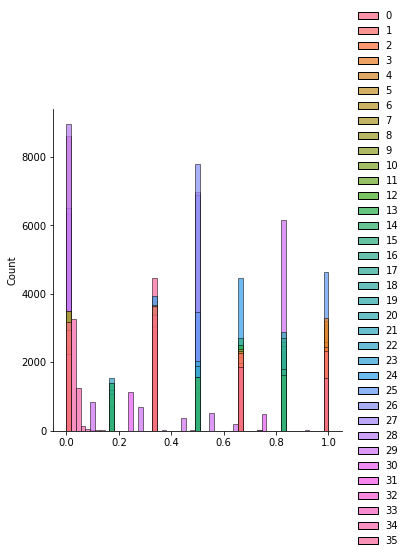

In [ ]:
sns.displot(X_test_scaled)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
RanFor=RandomForestClassifier(n_estimators=190,min_samples_split=3,min_samples_leaf=1,max_depth=160).fit(X_train_scaled,y_train)
Acc_ran=round(accuracy_score(y_test,RanFor.predict(X_test_scaled)),3)
f1_ran=round(f1_score(y_test,RanFor.predict(X_test_scaled),average='weighted'),3)
recall_ran=round(recall_score(y_test,RanFor.predict(X_test_scaled),average='weighted'),3)
precision_ran=round(precision_score(y_test,RanFor.predict(X_test_scaled),average='weighted'),3)
print('Accuracy:',Acc_ran)
print('F1_Score:',f1_ran)
print('Recall_Score:',recall_ran)
print('Precision_Score:',precision_ran)
print('Cross Validation Score:',round(np.mean(cross_val_score(RanFor, X_train_scaled, y_train, cv = 6)),3))
classification=classification_report(
    digits=4,
    y_true=y_test,
    y_pred=RanFor.predict(X_test_scaled))
print(classification)
confusion = confusion_matrix(y_test, RanFor.predict(X_test_scaled))

'''
fig, ax = plt.subplots(figsize=(10, 10))
im = ax.imshow(confusion, cmap=plt.cm.Blues)
for i in range(len(confusion)):
    for j in range(len(confusion[i])):
        text = ax.text(j, i, str(confusion[i, j]),
                       ha="center", va="center", color="black")

plt.colorbar(im)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
'''

<ipython-input-30-879b83983b9e>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RanFor=RandomForestClassifier(n_estimators=190,min_samples_split=3,min_samples_leaf=1,max_depth=160).fit(X_train_scaled,y_train)


Accuracy: 0.928
F1_Score: 0.926
Recall_Score: 0.928
Precision_Score: 0.928


C:\Users\Computer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Computer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Computer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Computer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column

Cross Validation Score: 0.928
                  precision    recall  f1-score   support

Extremely Severe     0.9830    0.9865    0.9847      3102
            Mild     0.8735    0.6912    0.7717      1059
        Moderate     0.8580    0.9148    0.8855      1902
          Normal     0.9437    0.9809    0.9619      2460
          Severe     0.9143    0.9073    0.9108      1693

        accuracy                         0.9281     10216
       macro avg     0.9145    0.8961    0.9029     10216
    weighted avg     0.9275    0.9281    0.9264     10216



'\nfig, ax = plt.subplots(figsize=(10, 10))\nim = ax.imshow(confusion, cmap=plt.cm.Blues)\nfor i in range(len(confusion)):\n    for j in range(len(confusion[i])):\n        text = ax.text(j, i, str(confusion[i, j]),\n                       ha="center", va="center", color="black")\n\nplt.colorbar(im)\nplt.title(\'Confusion Matrix\')\nplt.xlabel(\'Predicted\')\nplt.ylabel(\'Actual\')\nplt.show()\n'

In [ ]:
RanFor.predict(X_test_scaled)

array(['Extremely Severe', 'Normal', 'Mild', ..., 'Normal', 'Severe',
       'Severe'], dtype=object)

In [ ]:
from sklearn.svm import SVC
svm=SVC(C=10,gamma=0.1,kernel='rbf').fit(X_train_scaled,y_train)
accu_svm=round(accuracy_score(y_test,svm.predict(X_test_scaled)),3)
f1_score_svm=round(f1_score(y_test,svm.predict(X_test_scaled),average='weighted'),3)
Precision_svm=round(precision_score(y_test,svm.predict(X_test_scaled),average='weighted'),3)
Recall_svm=round(recall_score(y_test,svm.predict(X_test_scaled),average='weighted'),3)
print('Accuracy:',accu_svm)
print('F1_Score:',f1_score_svm)
print('Recall_Score:',Precision_svm)
print('Precision_Score:',Recall_svm)
print('Cross Validation Score:',(np.mean(cross_val_score(svm, X_train_scaled, y_train, cv = 6))))
classification=classification_report(
    digits=4,
    y_true=y_test,
    y_pred=svm.predict(X_test_scaled))
print(classification)
fig, ax = plt.subplots(figsize=(10, 10))
im = ax.imshow(confusion, cmap=plt.cm.Blues)
for i in range(len(confusion)):
    for j in range(len(confusion[i])):
        text = ax.text(j, i, str(confusion[i, j]),
                       ha="center", va="center", color="black")

plt.colorbar(im)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
Result={
                  'Model':['Random-Forest'],
                  'Accuracy(%)':[Acc_ran*100],
                  'F1_Score(%)':[f1_ran*100],
                  'Precision(%)':[precision_ran*100],
                  'Recall(%)':[recall_ran*100],
                    }
Result_Depression=pd.DataFrame(Result)


In [ ]:
Result_Depression

In [ ]:
import pickle
pickle.dump(RanFor, open('model1.pkl','wb'))

In [ ]:
model = pickle.load(open('model1.pkl','rb'))

NameError: name 'pickle' is not defined

In [ ]:
X.dtypes

Q3A                                  int64
Q5A                                  int64
Q10A                                 int64
Q13A                                 int64
Q16A                                 int64
Q17A                                 int64
Q21A                                 int64
Q24A                                 int64
Q26A                                 int64
Q31A                                 int64
Q34A                                 int64
Q37A                                 int64
Q38A                                 int64
Q42A                                 int64
Extraverted-enthusiastic             int64
Critical-quarrelsome                 int64
Dependable-self_disciplined          int64
Anxious-easily upset                 int64
Open to new experiences-complex      int64
Reserved-quiet                       int64
Sympathetic-warm                     int64
Disorganized-careless                int64
Calm-emotionally_stable              int64
Conventiona

In [ ]:
a = [1]
a[-1]

1